In [35]:
#importing libraries to be used
import numpy as np
import pandas as pd
import math
import sklearn

In [36]:
# reading the dataset for training the model
dataSet=pd.read_csv("./input_data/Iris.csv",delimiter=",",header=None)

In [37]:
cols=[x for x in range(5)]
inputData=dataSet[cols]

In [38]:
inputData.columns=["a1","a2","a3","a4","label"]

In [39]:
trainingData=inputData.sample(frac=0.8)
validationData=inputData.drop(trainingData.index)

In [40]:
def euclidDistance(a,b):
    temp=0
    for key in b:
        if key is not 'label':
            temp+=((b[key]-a[key])**2)
    return math.sqrt(temp)

distances=[]

for vrow in validationData.to_dict('records'):
    temp=[]
    for trow in trainingData.to_dict('records'):
        temp.append([euclidDistance(vrow,trow),trow['label']])
    distances.append(sorted(temp))

In [41]:
def KNNPredict(k):
    predictions=[]
    for i in range(len(validationData)):
        kLabels=[item[1] for item in distances[i][:k]]
        uVals,counts=np.unique(kLabels,return_counts=True)
        uValCount=dict(zip(uVals,counts))
        predLabel = max(uValCount.keys(), key=(lambda k: uValCount[k]))
        predictions.append(predLabel)
    labels=list(validationData['label'])
    truths,falses=0,0
    for i in range(len(labels)):
        a=labels[i]
        b=predictions[i]
        if(a==b):
            truths+=1
        else:
            falses+=1
    accuracy=(truths)/(len(validationData))
    return accuracy*100

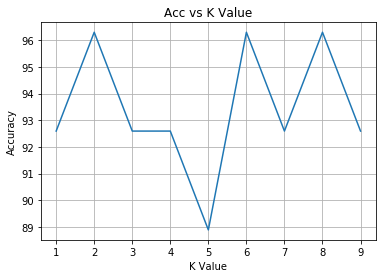

In [42]:
for k in range(1,int(math.sqrt(len(trainingData))),2):
    print("Accuracy on k: ",k,": ", KNNPredict(k),"%")